In [98]:
import time
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
#import seaborn as sns; sns.set()

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.externals import joblib
from sklearn.preprocessing import QuantileTransformer
from sklearn import model_selection
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
from sklearn import linear_model
from sklearn import ensemble

from scipy.sparse import vstack

In [4]:
prices = joblib.load('prices_250.pkl')
views = joblib.load('views_250.pkl')
features = joblib.load('tfidf_vectorized_features_250.pkl')

In [5]:
quantile_transformer = QuantileTransformer(output_distribution='normal').fit(prices.reshape(-1,1))
quantile_prices = quantile_transformer.transform(prices.reshape(-1,1))
quantile_prices = quantile_prices.reshape(1,-1)[0]

In [6]:
quantile_transformer = QuantileTransformer(output_distribution='normal').fit(views.reshape(-1,1))
quantile_views = quantile_transformer.transform(views.reshape(-1,1))
quantile_views = quantile_views.reshape(1,-1)[0]

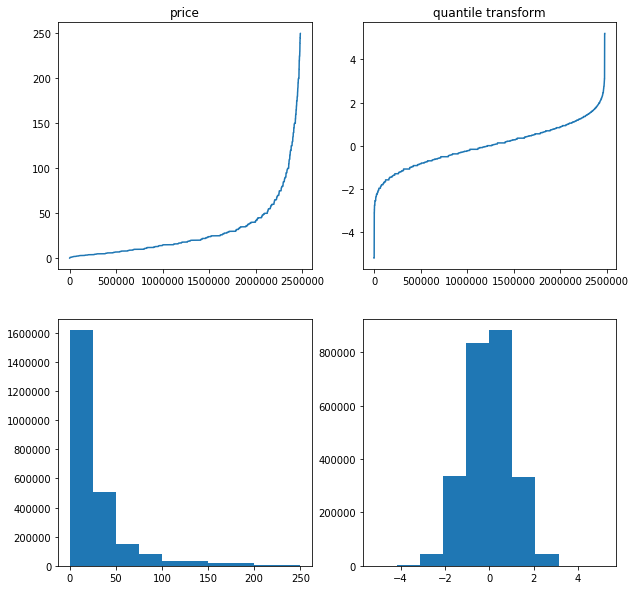

In [7]:
fig, ((ax0, ax1),(ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
ax0.plot(sorted(prices))
ax0.set_title('price')
ax2.hist(prices)

ax1.plot(sorted(quantile_prices))
ax1.set_title('quantile transform')
ax3.hist(quantile_prices)

plt.show()

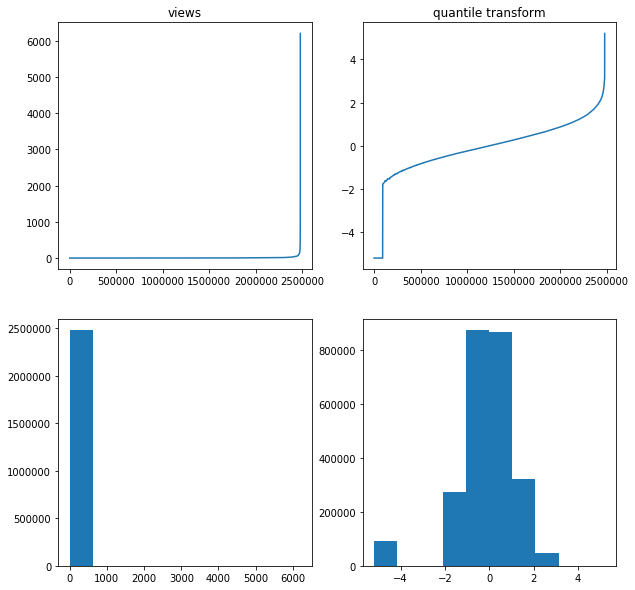

In [8]:
fig, ((ax0, ax1),(ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
ax0.plot(sorted(views))
ax0.set_title('views')
ax2.hist(views)

ax1.plot(sorted(quantile_views))
ax1.set_title('quantile transform')
ax3.hist(quantile_views)

plt.show()

In [9]:
estimator = joblib.load('FINAL_price_estimator.pkl')
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, quantile_prices, test_size = 0.2, random_state = 0, shuffle=True)
predict = estimator.predict(X_test)

mae = mean_absolute_error(y_test, predict)
r2 = r2_score(y_test, predict)
explained_variance = explained_variance_score(y_test, predict)
print("MAE: %.4f" % mae)
print("R2: %.4f" % r2)
print("Explained variance: %.4f" % explained_variance)

MAE: 0.4005
R2: 0.6889
Explained variance: 0.6889


In [10]:
real_predicted_price = quantile_transformer.inverse_transform(predict.reshape(-1,1))
real_y_test = quantile_transformer.inverse_transform(y_test.reshape(-1,1))

mae = mean_absolute_error(real_y_test, real_predicted_price)
r2 = r2_score(real_y_test, real_predicted_price)
explained_variance = explained_variance_score(real_y_test, real_predicted_price)
print("MAE: %.4f" % mae)
print("R2: %.4f" % r2)
print("Explained variance: %.4f" % explained_variance)

MAE: 4.6866
R2: 0.0864
Explained variance: 0.0891


Test Variance for Specific Categories

In [15]:
import psycopg2
import pandas as pd

In [16]:
username = 'postgres'
password = 'jlmlcook'
host     = 'localhost'
port     = '5432'
db_name  = 'etsy'

con = None
con = psycopg2.connect(user = username, password = password, host = host, port = port, database = db_name)

In [27]:
#Get relevant listing ids
sql_query = None
sql_query = """
SELECT DISTINCT listings.listing_id
FROM listings
FULL JOIN category_ids ON listings.listing_id=category_ids.listing_id
WHERE category_ids.category_id = 69150455
"""

Bags_Purses_id_list = pd.read_sql_query(sql_query,con)['listing_id'].tolist()

In [11]:
top_level_category_ids = [68887312, 68887336, 68887346, 68887366, 68887388, 68887400, 68887406, 68887416, 68887430, 68887434, 68887460, 68887482, 68887486, 68887494, 68887502, 69150341, 69150353, 69150359, 69150361, 69150367, 69150375, 69150385, 69150393, 69150405, 69150415, 69150425, 69150433, 69150437, 69150451, 69150455, 69150467]

In [12]:
top_level_category_names = ['Art', 'Bath and Beauty', 'Plants and Edibles', 'Holidays', 'Woodworking', 'Knitting', 'Needlecraft', 'Everything Else', 'Furniture', 'Pets', 'Music', 'Jewelry', 'Patterns', 'Weddings', 'Quilts', 'Crochet', 'Clothing', 'Geekery', 'Glass', 'Paper Goods', 'Candles', 'Books and Zines', 'Toys', 'Children', 'Dolls and Miniatures', 'Housewares', 'Supplies', 'Vintage', 'Ceramics and Pottery', 'Bags and Purses', 'Accessories']

In [13]:
for i in range(len(top_level_category_ids)):
    print(top_level_category_ids[i], top_level_category_names[i])

68887312 Art
68887336 Bath and Beauty
68887346 Plants and Edibles
68887366 Holidays
68887388 Woodworking
68887400 Knitting
68887406 Needlecraft
68887416 Everything Else
68887430 Furniture
68887434 Pets
68887460 Music
68887482 Jewelry
68887486 Patterns
68887494 Weddings
68887502 Quilts
69150341 Crochet
69150353 Clothing
69150359 Geekery
69150361 Glass
69150367 Paper Goods
69150375 Candles
69150385 Books and Zines
69150393 Toys
69150405 Children
69150415 Dolls and Miniatures
69150425 Housewares
69150433 Supplies
69150437 Vintage
69150451 Ceramics and Pottery
69150455 Bags and Purses
69150467 Accessories


In [18]:
len(Art_id_list)

142920

In [20]:
len(Bath_Beauty_id_list)

166358

In [22]:
len(Jewelry_id_list)

75095

In [26]:
len(Clothing_id_list)

352616

In [28]:
len(Bags_Purses_id_list)

172253

In [29]:
data = joblib.load('final_etsy_data.pkl')

In [76]:
reduced_data = data[data['price'] < 250].reset_index(drop=True)

In [77]:
Art_data = reduced_data.loc[data['listing_id'].isin(Art_id_list)]
Art_data_indices = list(Art_data.index.values)

In [78]:
Bath_Beauty_data = reduced_data.loc[data['listing_id'].isin(Bath_Beauty_id_list)]
Bath_Beauty_data_indices = list(Bath_Beauty_data.index.values)

In [79]:
Jewelry_data = reduced_data.loc[data['listing_id'].isin(Jewelry_id_list)]
Jewelry_data_indices = list(Jewelry_data.index.values)

In [80]:
Clothing_data = reduced_data.loc[data['listing_id'].isin(Clothing_id_list)]
Clothing_data_indices = list(Clothing_data.index.values)

In [81]:
Bags_Purses_data = reduced_data.loc[data['listing_id'].isin(Bags_Purses_id_list)]
Bags_Purses_data_indices = list(Bags_Purses_data.index.values)

In [82]:
Art_prices = np.array(Art_data['price'].tolist())
Bath_Beauty_prices = np.array(Bath_Beauty_data['price'].tolist())
Jewelry_prices = np.array(Jewelry_data['price'].tolist())
Clothing_prices = np.array(Clothing_data['price'].tolist())
Bags_Purses_prices = np.array(Bags_Purses_data['price'].tolist())

In [83]:
Art_quantile_transformer = QuantileTransformer(output_distribution='normal').fit(Art_prices.reshape(-1,1))
Art_quantile_price = quantile_transformer.transform(Art_prices.reshape(-1,1))

In [84]:
Bath_Beauty_quantile_transformer = QuantileTransformer(output_distribution='normal').fit(Bath_Beauty_prices.reshape(-1,1))
Bath_Beauty_quantile_price = quantile_transformer.transform(Bath_Beauty_prices.reshape(-1,1))

In [85]:
Jewelry_quantile_transformer = QuantileTransformer(output_distribution='normal').fit(Jewelry_prices.reshape(-1,1))
Jewelry_quantile_price = quantile_transformer.transform(Jewelry_prices.reshape(-1,1))

In [86]:
Clothing_quantile_transformer = QuantileTransformer(output_distribution='normal').fit(Clothing_prices.reshape(-1,1))
Clothing_quantile_price = quantile_transformer.transform(Clothing_prices.reshape(-1,1))

In [87]:
Bags_Purses_quantile_transformer = QuantileTransformer(output_distribution='normal').fit(Bags_Purses_prices.reshape(-1,1))
Bags_Purses_quantile_price = quantile_transformer.transform(Bags_Purses_prices.reshape(-1,1))

In [90]:
Art_vectorized_features = [features[index] for index in Art_data_indices]
Bath_Beauty_vectorized_features = [features[index] for index in Bath_Beauty_data_indices]
Jewelry_vectorized_features = [features[index] for index in Jewelry_data_indices]
Clothing_vectorized_features = [features[index] for index in Clothing_data_indices]
Bags_Purses_vectorized_features = [features[index] for index in Bags_Purses_data_indices]

In [101]:
Art_features = vstack(Art_vectorized_features)
Bath_Beauty_features = vstack(Bath_Beauty_vectorized_features)
Jewelry_features = vstack(Jewelry_vectorized_features)
Clothing_features = vstack(Clothing_vectorized_features)
Bags_features = vstack(Bags_Purses_vectorized_features)

Art

In [102]:
predict = estimator.predict(Art_features)

mae = mean_absolute_error(Art_quantile_price, predict)
r2 = r2_score(Art_quantile_price, predict)
explained_variance = explained_variance_score(Art_quantile_price, predict)
print("MAE: %.4f" % mae)
print("R2: %.4f" % r2)
print("Explained variance: %.4f" % explained_variance)

MAE: 1.5475
R2: -5.7513
Explained variance: 0.6018


Bath & Beauty

In [103]:
predict = estimator.predict(Bath_Beauty_features)

mae = mean_absolute_error(Bath_Beauty_quantile_price, predict)
r2 = r2_score(Bath_Beauty_quantile_price, predict)
explained_variance = explained_variance_score(Bath_Beauty_quantile_price, predict)
print("MAE: %.4f" % mae)
print("R2: %.4f" % r2)
print("Explained variance: %.4f" % explained_variance)

MAE: 1.5505
R2: -5.7567
Explained variance: 0.6028


Jewelry

In [104]:
predict = estimator.predict(Jewelry_features)

mae = mean_absolute_error(Jewelry_quantile_price, predict)
r2 = r2_score(Jewelry_quantile_price, predict)
explained_variance = explained_variance_score(Jewelry_quantile_price, predict)
print("MAE: %.4f" % mae)
print("R2: %.4f" % r2)
print("Explained variance: %.4f" % explained_variance)

MAE: 1.5460
R2: -5.9606
Explained variance: 0.5949


Clothing

In [105]:
predict = estimator.predict(Clothing_features)

mae = mean_absolute_error(Clothing_quantile_price, predict)
r2 = r2_score(Clothing_quantile_price, predict)
explained_variance = explained_variance_score(Clothing_quantile_price, predict)
print("MAE: %.4f" % mae)
print("R2: %.4f" % r2)
print("Explained variance: %.4f" % explained_variance)

MAE: 1.5466
R2: -5.8314
Explained variance: 0.5978


Bags & Purses

In [107]:
predict = estimator.predict(Bags_features)

mae = mean_absolute_error(Bags_Purses_quantile_price, predict)
r2 = r2_score(Bags_Purses_quantile_price, predict)
explained_variance = explained_variance_score(Bags_Purses_quantile_price, predict)
print("MAE: %.4f" % mae)
print("R2: %.4f" % r2)
print("Explained variance: %.4f" % explained_variance)

MAE: 1.5484
R2: -5.8045
Explained variance: 0.6022
